# Numpy

## Getting started with Numpy

Start by loading the `numpy` library (with alias `np`).

In [1]:
#import the library
import numpy as np

## The array object

Create out first array `a1` corresponding to the following matrix:

$a_1 = \left(\begin{array}{ccc}1&2&3&4&5\\5&4&3&2&1\end{array}\right)$

In [2]:
# create and display the array
a1 = np.array([[1,2,3,4,5],[5,4,3,2,1]])
a1


array([[1, 2, 3, 4, 5],
       [5, 4, 3, 2, 1]])

Using the attribute `dtype` (data type) of the array, show that Numpy inferred `a1`'s data type as `int64` (64 bit integer).

In [3]:
# display the type inferred
a1.dtype

dtype('int32')

* What is the shape of the array? 
* Can you reshape it into a 3x3 array? 
* how about a 5x2? 
* In what order does the reshape rearrange elements?

In [4]:
# your code here
a1.shape



(2, 5)

In [5]:
#a1.reshape(3,3) #give an error ValueError: cannot reshape array of size 10 into shape (3,3)

In [6]:
a1.reshape(5,2)

array([[1, 2],
       [3, 4],
       [5, 5],
       [4, 3],
       [2, 1]])

In [7]:
#In what order does the reshape rearrange elements?
#numpy unravel the array so it becomes 1,2,3,4,5,5,4,3,2,1
#it recombines as 
"""
array([[1, 2],
       [3, 4],
       [5, 5],
       [4, 3],
       [2, 1]])
"""

'\narray([[1, 2],\n       [3, 4],\n       [5, 5],\n       [4, 3],\n       [2, 1]])\n'

Numpy arrays try to infer the most general type that works with the input you've given it. What is the `dtype` of the following examples? run and check!

In [8]:
print(np.array([True, False, False, True]).dtype)
print(np.array([1, 2, 5, 1, 2]).dtype)
print(np.array([1, 2, 5, 1, 2, 3.0]).dtype)
print(np.array([1, 2, 'a', 1, 2]).dtype)

bool
int32
float64
<U11


What do you think will happen for elementwise operations? 
Create a simple vector with integer values and another one with floating point values. 

* make sure the shapes match
* add them and check the dtype of the result
* multiply them and check the dtype of the results

In [32]:
# your code here
a = np.arange(3, dtype=int)
b= np.arange(3, dtype=float)
a
b

array([0., 1., 2.])

In [10]:
a*b

array([0., 1., 4.])

In [11]:
(a*b).dtype

dtype('float64')

In [12]:
a+b

array([0., 2., 4.])

In [13]:

(a+b).dtype

dtype('float64')

### Array indexing and retrieving entries

To access entries for each dimension separated by a comma you can:

* give an integer index between `0` and `d-1` and between `-d` and `-1`
* give a list or array of valid integers
* give a range
  * `i:j` from `i` to `j` not included
  * `i:` all from `i`
  * `:i` all to `i` not included
  * `:` everything in that dimension

For the array `a1`  that you had created before

1. retrieve the first entry of the second row $\rightarrow$`5`

1. retrieve the last entry of the second row $\rightarrow$ `1`

1. retrieve the first column $\rightarrow$ `[1, 5]`

1. retrieve the rightmost 2x2 submatrix $\rightarrow$ `[[4, 5], [2, 1]]`

1. retrieve every second column $\rightarrow$ `[[1, 3, 5], [5, 3, 1]]` (use `np.arange`)

Does the output correspond to what you were expecting?

**Remember**: indexing starts at 0 in Python.


In [14]:
# add your code here to display the solutions
#retrieve the first entry of the second row  →→ 5
a1[1,0]

5

In [15]:
#retrieve the last entry of the second row  →→  1
a1[1,4]

1

In [16]:
#retrieve the first column  →→  [1, 5]
a1[:, 0]

array([1, 5])

In [17]:
#retrieve the rightmost 2x2 submatrix  →→  [[4, 5], [2, 1]]
a1[:, -2:]

array([[4, 5],
       [2, 1]])

In [18]:
#retrieve every second column  →→  [[1, 3, 5], [5, 3, 1]] (use np.arange)
a1[:,np.arange(0, a1.shape[1], 2)]

array([[1, 3, 5],
       [5, 3, 1]])

### Boolean indexing and functions on arrays

Still considering the same array `a1`,

* compute the mean of all the values that are smaller than 3
  * using the `mean()` method
  * using the `sum()` method and the `len()` function
* compute the variance of all values smaller than 3
  * using the `var()` method
  * remembering that the sample variance can be computed as $\sum_i x_i^2/n - (\sum_i x_i/n)^2$

In [47]:
mask = a1 < 3 #another way to write this is a1[a1<3]
l3 = a1[a1<3]

In [48]:
l3

array([1, 2, 2, 1])

In [49]:
np.mean(a1[mask]) #or
l3.mean()

1.5

In [50]:
np.sum(a1[mask])  #or
l3.sum()

6

In [51]:
len(a1[mask]) #or
len(l3)

4

In [52]:
np.var(a1[mask]) #or
l3.var()

0.25

In [54]:
#compute it using the sum notation above
np.sum(l3**2)/len(l3) - np.sum((l3)/len(l3))**2

0.25

### The case of vectors, columns and rows

We mentioned that a vector is not the same as a matrix column or a matrix row.
Let's see this in practice.

* create a simple vector `[1, 2, 3]`
* create a column matrix with the same elements
* create a row matrix with the same elements

try to do a simple operation between these things, what do you see?
Fix it using `reshape` or `squeeze`

In [57]:
# declare the vector, column and row
vec = np.arange(1,4)
row = vec.reshape(1,3)
col = vec.reshape(3,1)
vec


array([1, 2, 3])

In [58]:
row

array([[1, 2, 3]])

In [59]:
col

array([[1],
       [2],
       [3]])

In [60]:
# do a simple operation between those and show the results + its shape
vec + row

array([[2, 4, 6]])

In [61]:
vec + col

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [62]:
row + col

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [63]:
# use reshape and make all operations output the same result
vec + col.reshape(1,3)

array([[2, 4, 6]])

In [64]:
(vec + col.reshape(1,3)).shape

(1, 3)

In [66]:
(vec + col.reshape(1,3)).squeeze() #transforms it to a one dimensional array

array([2, 4, 6])

### Vector, Matrix, ... Tensors!

* The shape of a vector is `(p, )`
* The shape of a matrix is `(n, p)`
* The shape of a tensor is `(n, p, q, ...)` but where is this useful?

Images usually can be thought of as matrices where every entry corresponds to a pixel value.
These pixel values have three "channels", Red-Green and Blue if the image is in colours.
Let's check. 

Use `imread` from `imageio` to load `data/panda.jpg` and check the shape. You can see a documented example [here](https://imageio.readthedocs.io/en/latest/examples.html#imageio-usage-examples).

This will come back to this when we use neural networks to handle images.

In [68]:
from imageio import imread
# add your code to load the image, use ?imread if you want to see the doc
img = imread('data/panda.jpg')


Use matplotlib's method [plt.imshow()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to view the image you loaded.

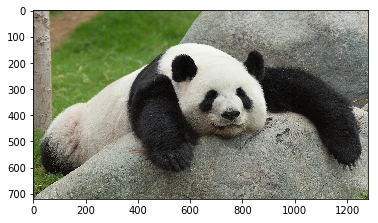

In [72]:
import matplotlib.pyplot as plt
# use plt.imshow() to show the image
%matplotlib inline  #a jupyter magic command. not really required here as this worked without it
plt.imshow(img)

## Other numpy methods

We'll now explore a few more methods for creating numpy arrays and doing mathematics, such as `np.linspace`, and `np.exp`. As ever, we are expecting you to refer to the documentation; for numpy, you'll find the API reference here: https://docs.scipy.org/doc/numpy/reference/index.html (though simply googling the function will normally get you what you want)

### Plotting data
As a quick aside, above we imported `matplotlib.pyplot` as `plt`.

**Important Note**:

* In Jupyter, if you want your plots to display directly in the notebook, you may need to have one cell somewhere with the line `%matplotlib inline` - depending on your default settings
* In "plain Python", if you want your plots to show, you will need to write `plt.show()` everytime you've defined a plot (not in Jupyter)

### plt.plot(), np.linspace(), and mathmatical functions

Use [np.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create a range of 100 points between -1 and 3. Call that `x` then compute the function $y=\sin(\exp(-x^2))$ (use [np.sin](https://docs.scipy.org/doc/numpy-1.10.4/reference/generated/numpy.sin.html) and [np.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)) and display it using [plt.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html). 

Additionally:
* using the option `ls` of `plt.plot` specify you want a dashed line
* using the option `color` of `plt.plot` specify you want the line to be red
* the maximum is attained at $x=0$, show that point on the curve with a black circle (use `marker`)

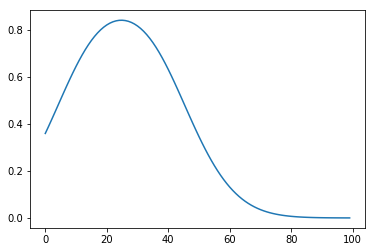

In [74]:
# add your code here to create the x values and the corresponding y values
x = np.linspace(-1, 3, 100)
y = np.sin(np.exp(-x**2))
plt.plot(y) #to explicitly display x values use plt.plot(x,y)

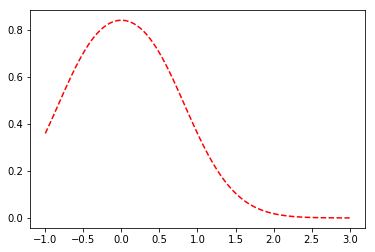

In [75]:
# add your code here to display the line. Make it dashed and red.
plt.plot(x,y, ls= 'dashed', color='red')

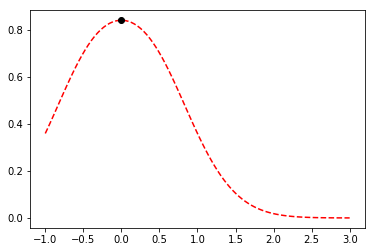

In [77]:
# in the same cell add your code here to display the maximum, make it a black circle
plt.plot(x,y, ls= 'dashed', color='red')
plt.plot(0, np.sin(np.exp(0)), marker='o', color='black')


### A second plot

Generate 500 random points in 2D using `np.random.randn` then display those without line (scatter plot). 

* display the points as small blue dots
* make the axis "equal" using `plt.axis`
* display the mean as a big red dot
* Add as title (`plt.title`) "Visualising random numbers", make the font size 14 using the option `fontsize`
* Call the x-axis "x-axis" and same for "y-axis" (`plt.xlabel`, `plt.ylabel`)
* Add a legend (`plt.legend`) indicating what the different elements are, put it in the bottom-left corner using the `loc` option


In [78]:
# generate the points, compute the mean
np.random.randn(500, 2)

array([[ 2.03551874e-01, -9.98151033e-01],
       [-2.69322536e-01,  1.12365748e+00],
       [ 2.32492803e-01,  1.07151106e+00],
       [-9.74077751e-02,  5.74088691e-01],
       [-6.76034973e-01, -1.36076314e-01],
       [-1.88529828e+00, -1.88311092e+00],
       [ 1.18687978e+00,  1.90943198e+00],
       [ 5.20316865e-01,  1.34992379e+00],
       [-1.46262766e+00, -4.40834846e-01],
       [-4.12387787e-01, -5.91142521e-01],
       [ 1.08427794e+00,  1.03334884e+00],
       [-7.15928409e-01,  3.23895505e-01],
       [ 3.92813632e-01,  7.78190127e-02],
       [-5.20810568e-01, -3.27339430e-01],
       [-4.30926898e-01, -6.25860565e-01],
       [ 1.76135435e-01, -6.04559646e-01],
       [ 9.57962332e-01, -1.02696710e-01],
       [-6.60267962e-01,  4.73299985e-01],
       [ 5.40908511e-01, -6.35319320e-02],
       [-8.48121793e-01,  5.25745410e-01],
       [ 2.75324373e-01,  8.46376610e-02],
       [-1.62549652e-01,  4.25404479e-01],
       [ 8.26504502e-01,  1.03304702e+00],
       [ 1.

In [80]:
#compute the mean
points = np.random.randn(500,2)
mean = points.mean(axis=0)
mean

array([0.01427977, 0.00427916])

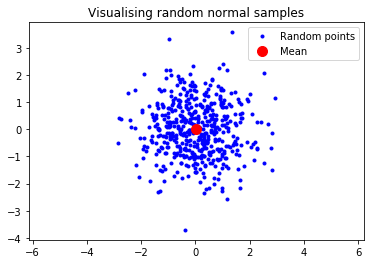

In [87]:
# display the points, make the axis equal
# display the mean as a big red dot
# add the title and the x/y labels and the legend
plt.plot(points[:,0], points[:, 1], '.', color='blue', ls='none')
plt.axis('equal') #to ensure the axes align
plt.plot(mean[0], mean[1], 'o', color='red', markersize=10)
plt.title('Visualising random normal samples')
plt.legend(['Random points', 'Mean'], loc='best')
